&copy; Bedzyk Research Group 2020, Northwestern University

<div class="alert alert-block alert-warning">
To start this project, in the top menu bar click $\text{Cell}\to \text{ Run All}$. Then, scroll back up to the top of this document.
</div>

In [1]:
#http://blog.nextgenetics.net/?e=102
from IPython.display import HTML
HTML('''<script>
code_show_2=true; 
function code_toggle_2() {
 if (code_show_2){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show_2 = !code_show_2
} 
$( document ).ready(code_toggle_2);
</script>
The raw code for this Jupyter Notebook is by default hidden for easier reading.
To toggle on/off the raw code for this entire notebook, click <a href="javascript:code_toggle_2()">here</a>.''')


<div class="alert alert-block alert-warning">
Raw code is hidden by default for the entire notebook. You can toggle on/off the raw code for this entire notebook by clicking the button above. More importantly, raw code for individual cells can be shown/hidden by using the message/button: <img src="images/show_hide_button.png"/> Hiding the code is mainly for visual purposes and may be useful if you would like a hard copy (i.e. pdf) of this document. However, there are also instances where you will need to show the code cell so you can input different parameters. This button will show up repeatedly throughout this document. Try showing and hiding the code in the cell block below as an example.
</div>

In [2]:
# importing the necessary libraries and packages for XRR.ipynb
import ipywidgets as widgets
from ipywidgets import Label, Layout
from IPython.display import display, Markdown, clear_output
from IPython.display import display
from IPython.display import Image
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy import integrate
from IPython.display import IFrame



# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
# https://gist.github.com/Zsailer/5d1f4e357c78409dd9a5a4e5c61be552

# This tag allows the supression of input cells that have to deal with formatting and code.
# You are viewing the "code" version of the "click here" button you just pressed
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
(To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.)''')
display(tag)

# Jupyter Notebook Introduction

Jupyter Notebook is a an open source web application/user interface that allows users to create and share documents containing code, equations, visualizations, and narrative text by using a combination of different programming languages. In this Jupyter Notebook (*XRR.ipynb*), we will be using **Python 3** for all analysis purposes (in the top right corner of this page, you will see the tag Python 3 which tells you the programming language of the notebook). The most important concept of Jupyter Notebooks is the concept of a **cell block**. Clicking on a block of text or code will highlight (in blue in this case) the current cell block you are viewing. Click on this block of text. In the menu bar at the top of this document, you will see a drop down menu: <img src="images/markdown_dropdown.png"/> 

**Markdown** is referring the type of this cell block. Markdown is a text formatting language supported in Jupyter Notebook. By *double clicking* on the text you are reading right now, you will see the Markdown version of the cell block. You will see the other types of supported cell blocks by clicking the drop down menu. For example, "Code" is another type of cell block you will be seeing in this document and they all contain snippets of Python 3 code. 

To run code of a particular cell block, click into the cell and either click the run button above: 

<img src="images/run_jupyter.png"/>

or click "Shift+Enter" on your keyboard. Running a cell will also allow you to exit the "code view" version of a Markdown cell block. 

That is all you will need to know for this laboratory exercise. Have fun and we welcome any positive/negative feedback!

>**NOTE:** *Do not worry if you do not know Python or Markdown as there is no coding necessary for completing this project. In fact, most code cells can be left hidden for the entire exercise and you never even have to see code!*

<br/><br/>
<div align="center">
<font size="18" color="#990000"><b> X-ray Reflectivity (XRR) </b></font>
</div>

# Overview of the technique

X-Ray Reflectivity (XRR) measures the intensity fraction of an incoming X-ray beam specularly reflected from a sample surface. X-rays penetrate the interface between two materials causing the X-rays to be refracted and reflected depending on the optical density difference, wavelength, and angle of incidence. The interferences/fringes are caused by the density difference at the interfaces of the layers. XRR is a very useful technique to determine layer thickness, layer density, surface/interface roughness, and in general the quality of layers/interfaces. **Fig. 1** shows the information that can be obtained form a XRR measurement both for one and two interfaces. 

<img src="images/xrr.png" />

>For further details about XRR and other surface sensitive X-ray techniques please refer to the following website:  
>https://www-ssrl.slac.stanford.edu/conferences/workshops/xrs2016/documents/hgs_sxr2016_sxrd.pdf

# Lab Description
In this lab, you will be analyzing X-ray reflectivity for a thin film of $\alpha\text{-Fe}_2\text{O}_3$ (hematite) epitaxially grown by pulsed laser deposition (PLD) on $\alpha\text{-Al}_2\text{O}_3$ $(006)$ ($c$-face sapphire) substrate. $\alpha\text{-Fe}_2\text{O}_3$ films are potentially of interest for water photooxidation and renewable energy (<a href="images/Kay_et_al.Fe2O3_photooxidation.JACS.2006.pdf">Kay, Cesar and Gratzel, JACS,2006</a>).

Here, we measure the reflectivity of the substrate/film which is caused by the difference in their electron density. This lab consists of the following steps:


1. **Getting Started in Smartlab**
2. **Sample Alignment** 
3. **Performing X-ray Reflectivity**
4. **Finishing Measurement**
5. **Data Reduction and Analysis**


<div class="alert alert-block alert-danger">
Depending on the equipment, sample, and the problem at hand, the specific steps in the checklists below may be different. It is important to consult with an expert to figure out what specifications are necessary for your system. In general though, XRR will follow similar guidelines.
</div>

## 1. Getting Started in Smartlab (Guidance / Studio II)

Here you will open Smartlab Guidance or Smartlab Studio II software and turn on the X-Ray Generator. Depending on the Smartlab you are working on, you will be using Smartlab Guidance (Smartlab Gen 1) or Smartlab Studio II software (Smartlab Gen 2). You will be doing your measurements in the Pro/Manual Control mode which allows you to be free to do any movement on any axis of the diffractometer. This is a preferred choice to fully understand what you are doing and is a great way to introduce the use of the diffractometer. Smartlab allows the use of routines/flows which can be very beneficial for streamlining the use of the equipment.

In the cell block below, please click on the what machine you are using. You will see a screen shot of the software for the machine you click on.

Most of the lab will be performed within the *Pro/Manual Control* window of the Smartlab softwares.

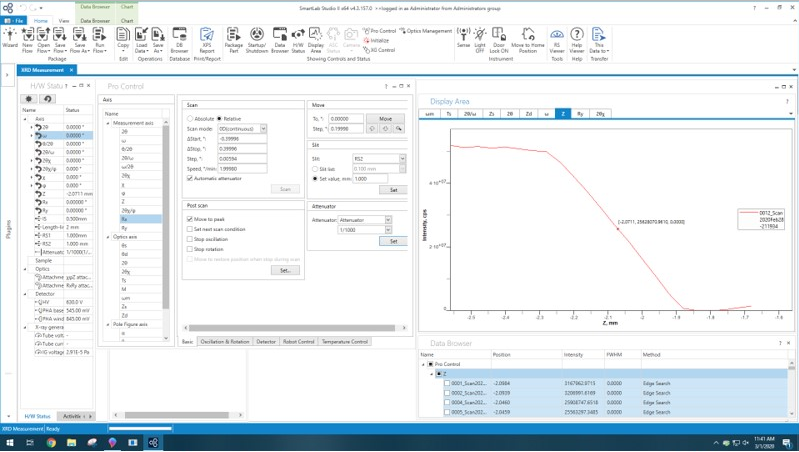

In [3]:
display(tag)
machine_button_1 = widgets.Button(
    description='Smartlab Gen 1, Guidance',
    disabled=False,
    button_style='Warning', # 'success', 'info', 'warning', 'danger' or ''
    layout={'width': '300px'}
)

machine_button_2 = widgets.Button(
    description='Smartlab Gen 2, Studio II',
    disabled=False,
    button_style='Warning', # 'success', 'info', 'warning', 'danger' or ''
    layout={'width': '300px'}
)

#defining what the button will do on clicking: output a screenshot of each software
def on_button_clicked_machine_1(b):
    clear_output()
    display(machines)
    display(Image(filename='images/guidance_2.png'))   
def on_button_clicked_machine_2(b):
    clear_output()
    display(machines)
    display(Image(filename='images/studio_II_2.png'))
    

machine_button_1.on_click(on_button_clicked_machine_1)
machine_button_2.on_click(on_button_clicked_machine_2)
        
#displaying the buttons for the two types of machines
machine_button_layout = widgets.Layout(align_items='center')
machines = widgets.VBox(children=[machine_button_1,machine_button_2],layout=machine_button_layout)
display(machines)

>You can check out these two videos about the Rigaku SmartLab system if you are interested in learning more:

><div><em><span style="text-align: left; color: #ff0000; text-transform: none; text-indent: 0px; letter-spacing: normal; font-size: 16px; font-variant: normal; font-weight: 400; text-decoration: none; word-spacing: 0px; display: inline; white-space: normal; orphans: 2; float: none; background-color: #ffffff;"><span style="background-color: #ffffff;">About the equipment:   <a href="https://www.youtube.com/watch?v=wAB9VHzOA1Q" target="_blank" rel="noopener">https://www.youtube.com/watch?v=wAB9VHzOA1Q</a></span></span></em></div>
><div><em><span style="text-align: left; color: #ff0000; text-transform: none; text-indent: 0px; letter-spacing: normal; font-size: 16px; font-variant: normal; font-weight: 400; text-decoration: none; word-spacing: 0px; display: inline; white-space: normal; orphans: 2; float: none; background-color: #ffffff;"><span style="background-color: #ffffff;">About the applications: <a href="https://www.youtube.com/watch?v=Kq9jthHvVxI" target="_blank" rel="noopener">https://www.youtube.com/watch?v=Kq9jthHvVxI</a></span></span></em></div>
<div> </div>


### Follow the instructions and put a check mark in each step as you advance. These steps are to set up the Smartlab software and initial conidtions for the experiment.

The following experiment will be performed in the *Pro/Manual Control* window of Smartlab Studio 2 software.

In [4]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code


# To do list containing all the steps for XRR on SmartLab (Gen 3? or Gen 2? the latest one)
step_list_getting_started = ['Open XG Control in the Home Tab',
            'Turn on the X-Ray tube and wait',
            'Set the voltage to $45$ kV and the current to $160$ mA',
            'Click on $\\text{SET}$ and wait',
            'Close XG Control and Open Pro/Manual Control in the Home Tab',
            'Look at the H/W Status Window in the left part of the screen. Make sure the following motors are set to zero in the H/W Status Tab: 2$\\theta$, $\omega$, 2$\\theta\chi$, $\chi$, $\phi$, R$_x$, R$_y$. If not, open the tab for the specific motor in Pro Control, type zero in the Move Tab and click on Move. In addition, double-check that the voltage is $45$ kV and current is $160$ mA.']
checkbox_array_getting_started = []
for step in step_list_getting_started:
    step_index = str(step_list_getting_started.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_getting_started.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb1 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_getting_started:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_getting_started.index(checkbox)+1))
            pb1.button_style='danger'
    if steps_completed == len(checkbox_array_getting_started):
        print("You finished Getting Started with Smartlab. Please, continue to Sample Alignment. Nice job!")
        pb1.button_style='success'
        
pb1.on_click(on_button_clicked)
display(pb1)

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Open XG Cont…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Turn on the …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Set the volt…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Click on $\\…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Close XG Con…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Look at the …

Button(button_style='info', description='Finish!', style=ButtonStyle())

### Setting Up Your Own Directory for Lab Projects

We would like to create a location where you can save/access all of your experimental data. All data that is generated from lab computers should be saved on the network drive labeled “mrc_xrayfac”, in the following directory: “netID folders/[your_net_ID]", where you would replace your own Northwestern net ID. To be more explicit, you should save your data in the following directory:

$\text{This PC} \to \text{mrc_xrayfac (\\\\resfiles.northwestern.edu)(Z:)} \to \text{netID folders} \to \text{[your_net_ID]}$

### Follow the instructions and put a check mark in each step as you advance. These steps are to set up your own directory in the X-ray facility server for the XRR experiment.

In [5]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code


# To do list containing all the steps for XRR on SmartLab (Gen 3? or Gen 2? the latest one)
step_list_directory = ['Navigate to the $\\text{netID folders}$ directory following the flow chart above.',
                      'Create a new folder within this directory with the folder name as your own net ID',
                      'Create a new folder named $\\text{461}$ within your net ID folder.',
                      'Within $\\text{461}$, create a folder named $\\text{PLD[film_size]Fe2O3_Al2O3}$, replacing $\\text{film_size}$ with the film size of the sample you have been provided (e.g $\\text{PLD50nmFe2O3_Al2O3})$. <i><b>NOTE:</b> PLD refers to pulsed laser deposition, the technique used to grow this film.</i>',
                      'Finally, within the PLD folder, create a new folder titled $\\text{XRR_lab}$. This is where you will save all of your data.']
checkbox_array_directory= []
for step in step_list_directory:
    step_index = str(step_list_directory.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_directory.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb5 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
    
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_directory:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_directory.index(checkbox)+1))
            pb5.button_style='danger'
    if steps_completed == len(checkbox_array_directory):
        print("Great work. Move on to Sample Alignment.")
        pb5.button_style='success'
        
pb5.on_click(on_button_clicked)
display(pb5)

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Navigate to …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Create a new…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Create a new…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Within $\\te…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Finally, wit…

Button(button_style='info', description='Finish!', style=ButtonStyle())

## 2. Sample Alignment (Thin Film)

Here, we place the sample normal perpendicular to the incoming beam and move halfway into the beam. Please refer to the figure below to know the convention for a 4-circle diffractometer (**Fig. 2**). The name 4-circle comes from the four axis of rotation of the instrument (2$\theta$, $\Omega$, $\chi$, $\phi$). The equipment you will be using, Smartlab, has this diffractometer. In you measurements, you will be working mostly with the $\Omega$ and $2\theta$ angles. $\Omega$ represent the incident angle of the X-rays. It is very common that the source is fixed, for instance in synchrotrons, so the sample is rotated ($\Omega$) to change the incident beam angle. In contrast, Smartlab source free to move ($\Omega$) and the sample can be fixed. $2\theta$ is the detector angle and allow you to go to the Bragg position of the substrate/film.


<div align="center">
<FIGURE> 
    
   <IMG SRC="images/4_circle.png" TITLE = "Figure 2">    
    <FIGCAPTION> <b>Fig. 2:</b> <i> 4-circle geometry</i></FIGCAPTION>
    
</FIGURE>
</div>

The substrate is glued to the sample holder which causes a slight offset that needs to be corrected (exagerrated in the  **Fig. 3** below). This happens due to the innacuracy of the sample mounting. The figure below shows the corrected angle $\tau_\text{corr}$ which is called R$_y$ in Smartlab. 

<div align="center">
<FIGURE> 
    
   <img src="images/omega_correction.png"  TITLE = "Figure 3">    
    <FIGCAPTION><b>Fig. 3: </b> <i> Glue offset of sample (exagerrated for visual purposes)</i></FIGCAPTION>
    
</FIGURE>
</div>

In addition to R$_y$, you will be moving $z$ such that the X-ray beam is cut in half (**Fig. 4**). This is essential for an accurate measurement of the diffraction peaks.

<div align="center">
<FIGURE> 
    
   <img src="images/half_beam.png"  TITLE = "Figure 4">    
   <FIGCAPTION><b>Fig. 4: </b> <i> X-ray beam being cut in half </i></FIGCAPTION>
    
</FIGURE>
</div>

### Follow the instructions and put a check mark in each step as you advance. These steps are to align the thin film sample in preparation for measurements.

The following experiment will be performed in the *Pro/Manual Control* window of Smartlab Studio 2 software.

In [6]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code


# To do list containing all the steps for XRR on SmartLab (Gen 3? or Gen 2? the latest one)
step_list_alignment = ['Make sure the sample is centered on the stage (circular plate)',
            'In Pro/Manual Control, select $z$ from the Axis list. Set up the slits to the following: IS$=0.1$ mm, RS$_1=0.2$ mm, RS$_2=0.2$ mm. Make sure to click on set to update the values in the H/W status window.',
            'Move $z$ to -$1$ mm',
            'Select the $z$ tab and check the option Move to Peak in the Post scan Tab. There, click on the option $\\text{Set...}$ and select edge search for peak search method. Click $\\text{Ok}$.',
            'Make sure Automatic Attenuator is checked in the Scan Tab.',
            'Perform a $z$ scan [Relative -$0.25$ to $0.25$, step$=0.002$ mm/step, speed$=2$ mm/min]. Make sure the option Relative is selected. Click on Scan to start.',
            'Select R$_y$ from the Axis List. Check the option Move to Peak in the Post scan Tab. There, click on the option $\\text{Set...}$ and select Full Width at Half Maximum Center (or Maxium Intensity) for Peak Search Method. Click $\\text{Ok}$.',
            'Perform a R$_y$ scan [relative -$1$ to $1$, step$=0.01$ deg/step, speed$=4$ deg/min]. Again, make sure Automatic Attenuator is checked.',
            'Select the $z$ tab and perform the same $z$ scan. Make sure the Peak Search option is in Edge Search.',
            'Save $z$ scan. Right click on your last $z$ scan in Data Browser  (Smartlab Studio II) or in the graph (SmartLab Guidance). Select $\\text{Export data}\\to\\text{to File}$ and save in your netID directory in the following format: "z_stb.ras". <i><b>NOTE: </b> Make sure to save the scan in the "ras" format, NOT "rasx". </i>',
            'Record the Straight Through Beam Intensity (STB) in the $\\textbf{Important Parameters}$ section below. To find the STB, in the top of the screen select the chart tab. Click on Coordinate and place the cursor at the maximum value of your scan. It should be around ($5\\times 10^{7}$ cps)']
checkbox_array_alignment= []
for step in step_list_alignment:
    step_index = str(step_list_alignment.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_alignment.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb2 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
    
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_alignment:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_alignment.index(checkbox)+1))
            pb2.button_style='danger'
    if steps_completed == len(checkbox_array_alignment):
        print("You finished Sample Alignment. Good Job! Now we are ready to perform X-Ray Reflectivity on our sample.")
        pb2.button_style='success'
        
pb2.on_click(on_button_clicked)
display(pb2)

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Make sure th…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='In Pro/Manua…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Move $z$ to …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Make sure Au…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Perform a $z…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>7:'), HTMLMath(value='Select R$_y$…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>8:'), HTMLMath(value='Perform a R$…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>9:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>10:'), HTMLMath(value='Save $z$ sc…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>11:'), HTMLMath(value='Record the …

Button(button_style='info', description='Finish!', style=ButtonStyle())

# *NOTES FOR THIS SECTION*

<div class="alert alert-block alert-danger">
    
- Need better diagrams with all axes and angles labelled 

- Add instructions for transferring data from X-ray lab server to personal computer  

- Needed to download pdf viewer plugin for chrome https://chrome.google.com/webstore/detail/pdf-viewer/oemmndcbldboiebfnladdacbdfmadadm/related?hl=en
</div>

Here is an example $z$ scan for the straight through beam. Your $z$-scan should look similar.

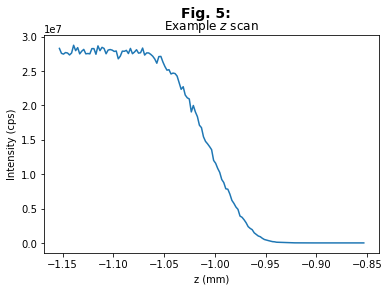

In [7]:
display(tag)
file_z = "example/ZscanSTBXRR_0014_Scan2020Jan24-124745.dat"
df_z = pd.read_csv(file_z,skiprows=800,sep='\s+')
plt.figure()
plt.plot(df_z.index.values,df_z.values)
plt.suptitle('Fig. 5:', fontsize=14, fontweight='bold')
plt.title('Example $z$ scan')
plt.xlabel('z (mm)')
plt.ylabel('Intensity (cps)')
plt.show()

<div class="alert alert-block alert-info">
    <strong> Think about it... </strong>
    
One can approximate the size of the X-ray beam by looking at the $z$-scan. What is the approximate beam size of the example sample shown above?
</div>

We can acquire a more accurate beam size by fitting the $z$-scan with an error function (technically, we will fit $\text{erfc}(x) = 1-\text{erf}(x)$, the complimentary error function). The error function comes from the convolution of a step function with a gaussian approximation of the beam. Here we will fit the $z$-scan to see if your approximate beam size makes sense. Here is the function we will be fitting:
$$I(z) = \frac{A}{2}\cdot\text{erfc}\Big[\frac{(x+x_0)}{\sigma}\Big]+\text{bkg}$$
where $\frac{A}{2}$ is the straight through beam intensity, $\text{bkg}$ is the background intensity, and $\sigma$ is related to the beam size ($\text{beam size}\simeq2.35\cdot\sigma$). 

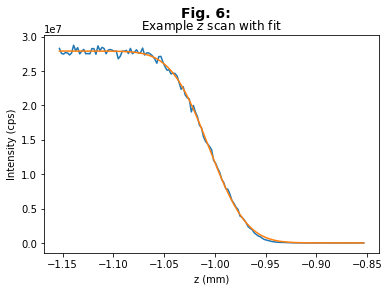

Straight through beam intensity = 27914929.15912143
Background intensity = 1.730729448645718e-11
Beam size(mm) = 0.09773037913852908


In [8]:
display(tag)

#define erf complimentary fit with extra parameters
def erfc_fit(x,A,bkg,shift,sigma):
    return (A/2)*erfc((x+shift)/sigma)+bkg

#convert data frame into lists
data_test=[]
x_values = []
for value in df_z.values:
    data_test.append(value[0])
for value in df_z.index.values:
    x_values.append(value)
    
#fit the data with initial guess
guess = [1e7,0,1,0.1]
popt, pcov = curve_fit(erfc_fit, x_values, data_test,p0=guess, bounds=((0, 0, 0, 0), (np.inf, np.inf, np.inf, np.inf)))
#print out parameters and show plot of data with fit
plt.figure()
plt.suptitle('Fig. 6:', fontsize=14, fontweight='bold')
plt.title('Example $z$ scan with fit')
plt.xlabel('z (mm)')
plt.ylabel('Intensity (cps)')
plt.plot(x_values,data_test)
plt.plot(x_values,erfc_fit(x_values,*popt))
plt.show()
print("Straight through beam intensity = " + str(popt[0]))
print("Background intensity = " + str(popt[1]))
print("Beam size(mm) = " + str(2.35*popt[3]))

### _Important Parameters_

The cell below is place where you can record various important parameters that will come up throughout the experiment. 

Whenever you update the values, make sure to run the cell by clicking into the cell and either clicking the run button above: <img src="images/run_jupyter.png"/>
or by clicking "Shift+Enter" on your keyboard.

To test if you executed the cell, the parameters and their values will all be listed in the drop down menu below where you can click "Print Variable" to see its value.

Show the cell block's raw code by clicking the toggle button below and then input your parameter values.

In [9]:
# Here is a list of important parameters for you to fill out
display(tag)

straight_through_beam = 5e8 #cps
beam_size = 0.1 #mm
slit_size = 0.5 #mm

In [10]:
# selecting variables for button
button_variables = ['straight_through_beam', 'beam_size','slit_size']
funcs = []
for i in button_variables:
    funcs.append(i)
 
# creating menu with them   
button_vars = widgets.Dropdown(
    options=funcs)
# button, output, function and linkage
butt = widgets.Button(description='Print Variable')
outt = widgets.Output()
def on_butt_clicked(b):
    with outt:
        clear_output()
        #print(type(globals()[button_vars.value]))
        print(globals()[button_vars.value])
        
butt.on_click(on_butt_clicked)
# display
widgets.VBox([button_vars,butt,outt])

## 3. Performing X-ray Reflectivity

### Follow the instructions and put a check mark in each step as you advance.

The following experiment will be performed in the *Pro/Manual Control* window of Smartlab Studio 2 software.

In [11]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code


# To do list containing all the steps for XRR on SmartLab (Gen 3? or Gen 2? the latest one)
step_list = ['Select the $2\\theta\omega$ axis in Pro/Manual Control. Move $2\\theta\omega=0.4$ deg. This is done to better align $\omega$ to $\\frac{1}{2}(2\\theta)$ (specular condition).',
            'Select R$_y$ and do the following scan  [relative -$0.1$ to $0.1$, step$=0.005$ mm/step, speed$=0.4$ deg/min]. Make sure you change to FWHM in peak search.',
            'Perform a $2\\theta\omega$  scan  [absolute $0$ to $5$ deg, step$=0.02$ mm/step, speed$=5$ deg/min]. This a coarse $2\\theta\omega$  scan to locate fringes (i.e. high speed scan). We will perform another $2\\theta\omega$ scan to optimize the counts with a lower speed later.',
            'Move to the plateau of a fringe close to $2$ degrees. To do this put the mouse to the position you want to move to. Right click and select the option "Send Position" and "To". Then click Move in the $2\\theta\omega$ tab. The idea here is to optimize the intensity for the fringes.',
            'Select the R$_y$ axis. Perform a relative R$_y$ scan  [relative -$0.1$ to $0.1$, step$=0.005$ mm/step, speed$=0.4$ deg/min]. Make sure you change to FWHM in Peak Search.',
            'Select the R$_x$ axis. Perform a relative R$_x$ scan  [relative -$2$ to $2$, step$=0.05$ mm/step, speed$=8$ deg/min]. Here, you are optimizing the intensity by rotating the sample in an axis $90$ deg off of the R$_y$ axis.',
            'Again, select the R$_y$ axis. Perform a relative R$_y$ scan  [relative -$0.1$ to $0.1$, step$=0.005$ mm/step, speed$=0.4$ deg/min]. Make sure you change to FWHM in peak search. This repeated procedure creates better alignment and allows you to optimize the intensity of the reflectivity signal.',
            'Select the $2\\theta\omega$ axis. Perform a $2\\theta\omega$  scan  [absolute $0$ to $5$ deg, step$=0.02$, speed$=1$ deg/min].',
            'Save $2\\theta\omega$ scan as "2TW_XRR_RIDGE.ras"',
            'Now we want to perform a background scan. This is done by offsetting the sample slightly in R$_y$. Firstly, locate your most recent R$_y$ scan',
            'Find the FWHM. Calculate double the FWHM and record that value.',
            'Select the R$_y$ axis and move R$_y$ up or down by the value you just recorded (e.g. if R$_y$ is at $1$ and $2\cdot$FWHM$=1$, move R$_y$ to $2$ or $0$). R$_y$ is now offset.',
            'Repeat the $2\\theta\omega$ scan and save the scan as "2TW_XRR_BKG.ras". This data will need to be subtracted from your "2TW_XRR_RIDGE.ras" data when performing analysis.']
checkbox_array = []
for step in step_list:
    step_index = str(step_list.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb3 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array.index(checkbox)+1))
            pb3.button_style='danger'
    if steps_completed == len(checkbox_array):
        print("You completed all the steps. Nice job!")
        pb3.button_style='success'
        
pb3.on_click(on_button_clicked)
display(pb3)

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Select R$_y$…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Perform a $2…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Move to the …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Select the R…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Select the R…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>7:'), HTMLMath(value='Again, selec…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>8:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>9:'), HTMLMath(value='Save $2\\the…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>10:'), HTMLMath(value='Now we want…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>11:'), HTMLMath(value='Find the FW…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>12:'), HTMLMath(value='Select the …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>13:'), HTMLMath(value='Repeat the …

Button(button_style='info', description='Finish!', style=ButtonStyle())

<div class="alert alert-block alert-info">
    <strong> Think about it... </strong>
    
The background scan becomes more and more important as you move to higher $2\theta\omega$ values. Why is this the case?
</div>

Here is an example $2\theta\omega$ scan during a reflectivity experiment. Your scan should look similar.
###### specXRR111_Al2O3_006.dat example

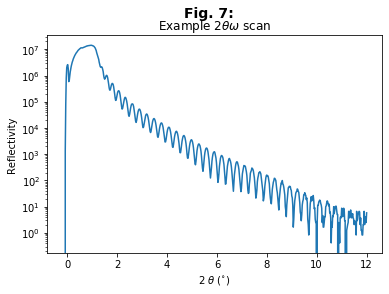

In [12]:
display(tag)
file = "example/specXRR111_Al2O3_006.dat"
file_background = "example/XRRBKGPt111_Al2O3_006.dat"
df = pd.read_csv(file,skiprows=800,sep='\s+')
df_background = pd.read_csv(file_background,skiprows=800,sep='\s+')
df_bg_corrected = df - df_background
plt.figure()
plt.suptitle('Fig. 7:', fontsize=14, fontweight='bold')
plt.title('Example 2$\\theta\omega$ scan')
plt.plot(df_bg_corrected.index.values,df_bg_corrected.values)
plt.yscale('log')
plt.xlabel('2 $\\theta$ ($^{\circ}$)')
plt.ylabel('Reflectivity')
plt.show()

# *NOTES FOR THIS SECTION*

<div class="alert alert-block alert-danger">

- Explain the geometry of each scan (with figure as reference)

- Show example of XRR data in this section from Hematite on Sapphire

- $2\theta\chi$ scan? (making sure detector is lined up with reflected beam) (in plane scan with detector, sample moved out of the way)

- changing of incident slit from 5 to 2mm

- talk to Anusheela about accessing //resfiles.northwestern.edu

</div>

# 4. Finishing Measurement

Congratulations on performing an X-ray reflectivity experiment. We hope it was a good experience. It is now to complete some final steps. Always leave the Smartlab in the same state as it was before you began your experiment (e.g. X-ray source turned off, software closed, etc.).

### Follow the instructions and put a check mark in each step as you advance.

The following experiment will be performed in the *Pro/Manual Control* window of Smartlab Studio 2 software.

In [13]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code


# To do list containing all the steps for XRR on SmartLab (Gen 3? or Gen 2? the latest one)
step_list_finish = ['Make sure the following motors are set to zero in the H/W Status Tab: $2\\theta$, $\omega$, $2\\theta\chi$, $\chi$, $\phi$, R$_x$, R$_y$. If not, open the tab for the specific motor in Pro Control, put zero and click on Move.',
            'Open XG Control in Home Tab.',
            'Turn Off the X-Ray by clicking the Off button. There is no need to set the voltage or current to any value.',
            'In the Data Browser Window, delete all your scans so next user can start with a clean workspace. Make sure you have all the necessary scans saved.']
checkbox_array_finish = []
for step in step_list_finish:
    step_index = str(step_list_finish.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_finish.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb4 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_finish:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_finish.index(checkbox)+1))
            pb4.button_style='danger'
    if steps_completed == len(checkbox_array_finish):
        print("You are all set!")
        print("Please let us know if anything can be improved.") 
        print("You are the first people to use this Jupyter Notebook in the 461 lab course at Northwestern. Thanks!")
        pb4.button_style='success'
        
pb4.on_click(on_button_clicked)
display(pb4)

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Make sure th…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Open XG Cont…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Turn Off the…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='In the Data …

Button(button_style='info', description='Finish!', style=ButtonStyle())

# 5. Data Reduction and Analysis

Data has no meaning until you analyze. Here we will visualize and perform a basic analysis of the XRR data you just recorded. In the cell below, please replace the default file name with your file name. Then, you can run the cell blocks below to plot and fit your XRR sample data.

###### xrr.csv example (Fe2O3 on Al2O3 from Joseph McCourt and Roger Reinertsen 461 project 2019)

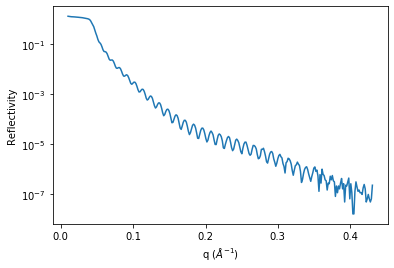

In [14]:
# The default file_name refers to example data for XRR. Please reassign file_name to the name of your file
# e.g. file_name = "your_file_name.ras"
display(tag)
file_name = "example/xrr.csv"

# The code below will show a plot of your data on a log scale with appropriate axes labels
data = pd.read_csv(file_name,header=None)
plt.plot(data[0],data[1])
plt.yscale('log')
plt.xlabel('q ($\AA^{-1}$)')
plt.ylabel('Reflectivity')
plt.show()

### Inspecting the Data: First step to Analysis

Following **Fig. 1**, we will now do approximations of certain features of the data. It is a good practice to inspect the data first before immediately performing a fit. This way, you will be able to tell whether or not your data makes sense and understand more about what the fit is telling you.

  1. Find $\theta_\text{critical}$
  2. Approximate thickness (related period of oscillations)
  3. Approximate roughness 

#### Theory and Fitting the Data

Here is the equation we will be using to fit the data. 

$$R = \Big[\Big(\frac{2q}{q_c}\Big)^{2}-1-\Big(\frac{2q}{q_c}\Big)\sqrt{\Big(\frac{q}{qc}\Big)^2-1}\Big]\Big(1-4B(1-B)\Big(\sin\frac{qt}{2}\Big)^{2}\Big)\exp^{-q^2\sigma^2}$$

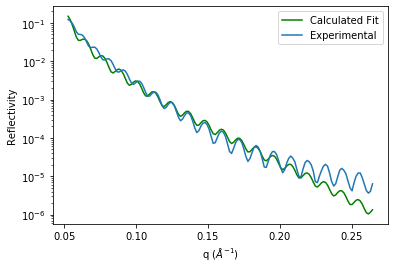

B = 1.1635224931773538
thickness (t) [Angstroms] = 529.6936314519822
sigma (roughness) [Angstroms] = 7.65190221099023


In [15]:
display(tag)

# need to add in a way to locate the q_critical (q_c) instead of just manually inputting the value
qc = 0.045

def rf(q):
    return (2*(q/qc)**2-1-2*(q/qc)*np.sqrt((q/qc)**2-1))**2

def r_lowq(q,B,t,sigma):
    return (1-4*B*(1-B)*(np.sin(q*t/2))**2)*np.exp(-q**2*sigma**2)

def r(q,B,t,sigma):
    return rf(q)*r_lowq(q,B,t,sigma)

#only fit certain range of low q data
sliceobj=slice(30,180)

guess = [1.3,525,8]
popt, pcov = curve_fit(r, data[0][sliceobj], data[1][sliceobj],sigma = data[1][sliceobj],p0 = guess)

plt.yscale('log')
plt.plot(data[0][sliceobj],r(data[0][sliceobj],*popt),label = "Calculated Fit",color ='g')
plt.errorbar(data[0][sliceobj], data[1][sliceobj],label="Experimental",ecolor='r')
plt.legend()
plt.xlabel('q ($\AA^{-1}$)')
plt.ylabel('Reflectivity')
plt.show()

print("B = " + str(popt[0]))
print("thickness (t) [Angstroms] = " + str(popt[1]))
print("sigma (roughness) [Angstroms] = " + str(popt[2]))

<div class="alert alert-block alert-info">
    <strong> Think about it... </strong>
    
What are units of the $B$ parameter and what does it represent? Does this value make sense for the sample you measured?
</div>

Here is a slide from your class lecture on thin film reflectivity. The formula above should now look more familiar.

<img src="images/thin_film_reflectivity_class_slide.png" />

In [16]:
display(tag)
# # Instead of setting the cell to Markdown, create Markdown from withnin a code cell!
# # We can just use python variable replacement syntax to make the text dynamic
# Markdown("| Parameter | Value   | \
#          \n|------|------|\
#          \n|   a  | {}|\
#          \n|   b  | {}|\
#          \n|   Straight Through Beam  | {}|\
#          \n|   Slit Size  | {}|".format(a,b,straight_through_beam,slit_size))